In [1]:
from datasets import geology_loader

magdata = geology_loader.load_temporal_edgelist('datasets/coauth-MAG-History-full-edgelist.txt')

maximum time stamp is 181


In [2]:
import nodeshift

pyg_mag = nodeshift.pyg_from_networkx_list(magdata)

In [3]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
#EXECUTE THIS CELL TO RETRAIN ALL
results = nodeshift.encode_over_time(pyg_mag, device, folder='node-embeddings/mag2')

import pickle

with open('MAG2_avgpr_results','wb') as fp:
    pickle.dump(results, fp)

Timestamp 0 done
Timestamp 10 done
Timestamp 20 done
Timestamp 30 done
Timestamp 40 done
Timestamp 50 done
Timestamp 60 done
Timestamp 70 done
Timestamp 80 done
Timestamp 90 done
Timestamp 100 done
Timestamp 110 done
Timestamp 120 done
Timestamp 130 done
Timestamp 140 done
Timestamp 150 done
Timestamp 160 done
Timestamp 170 done
Timestamp 180 done


In [5]:
import pickle
with open('MAG2_avgpr_results','rb') as fp:
    results = pickle.load(fp)

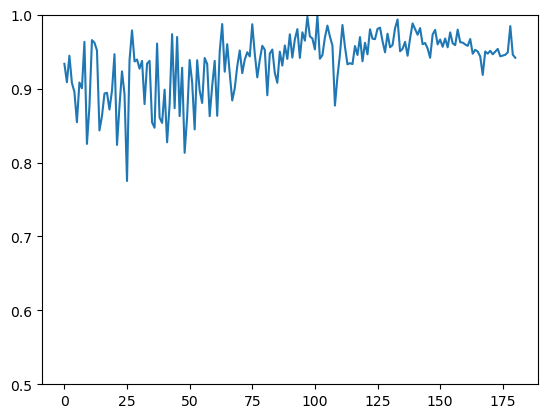

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(len(results)),results)
plt.ylim(0.5,1)
plt.show()

In [7]:
embeddings_snap = []
for t in range(181):
    embeddings = torch.load(f'node-embeddings/mag2/{t}_embeddings.pt')
    embeddings_snap.append(embeddings)

In [8]:
activities = nodeshift.get_activity_vectors(embeddings_snap)

In [9]:
import numpy as np

In [145]:
from sklearn.metrics.pairwise import cosine_similarity
anomaly_scores = []
window = 2
for t in range(0,1):
    anomaly_scores.append(0)
for t in range(1,len(activities)):
    previous = np.mean(activities[t-window if t-window>=0 else 0:t],axis=0)
    current = activities[t]
    cosine_sim = nodeshift.cosine_sim(current, previous)
    anomaly = 1-nodeshift.cosine_sim(current, previous) if cosine_sim >=0 else abs(cosine_sim)
    #anomaly = 1-nodeshift.cosine_sim(current, previous)
    anomaly_scores.append(anomaly)

final_scores = []
for t in range(len(anomaly_scores)):
    if t <= window: 
        final_scores.append(0)
    else:
        final_scores.append(max(0,anomaly_scores[t]-sum(anomaly_scores[t-window:t])))
        #final_scores.append(max(0,anomaly_scores[t]-anomaly_scores[t-1]))

In [146]:
[x[0] for x in [(k+1837,v) for k,v in enumerate(final_scores) if v > np.quantile(final_scores, [0.9])]]

[1842,
 1849,
 1850,
 1857,
 1882,
 1885,
 1886,
 1939,
 1955,
 1962,
 1968,
 1978,
 1985,
 1990,
 1991,
 1998,
 1999,
 2016]

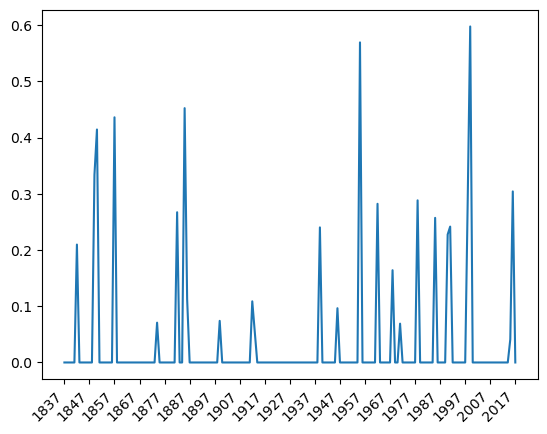

In [148]:
plt.plot(range(1837, 1837+181),final_scores)
plt.xticks(range(1837,1837+181,10), rotation=45, ha="right")
plt.show()

In [ ]:
trends = [1 for i in range(coin_loader.